# Heart Disease dataset


In [19]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_heart

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances 1025 - Features 13 - Class 2
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


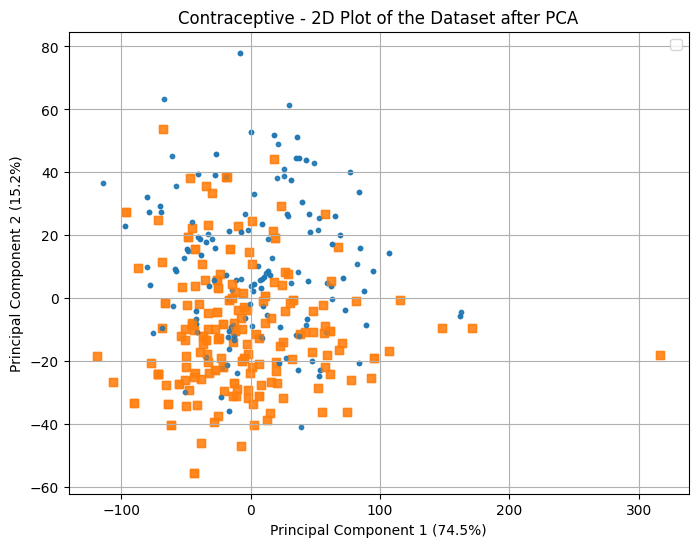

In [20]:

# fetch dataset
df = load_heart()

# data (as pandas dataframes)
X = pd.DataFrame(df.iloc[:, :-1])
y = pd.DataFrame(df.iloc[:, -1])

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
plotting(X, y, ds_name="Contraceptive", matrix_plot=False)
c = len(np.unique(numeric_labels))

# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [9]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", epsi=1e-5)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [427.0859476795742, 427.08623901457446, 427.08624194234613, 427.08624348803335, 427.0862435709351, 427.08624364959724, 427.0862447709305, 427.08624479024263, 427.086247838086, 427.9025187485336]
ARI values: [0.27582555305385265, 0.27582555305385265, 0.27582555305385265, 0.27582555305385265, 0.27582555305385265, 0.27582555305385265, 0.27582555305385265, 0.27582555305385265, 0.27582555305385265, 0.20150913122110548]
NS values: [0.9652919747432309, 0.9653702702026172, 0.9653706639610928, 0.965370925888978, 0.9653709274880385, 0.9653709498116257, 0.965371121475814, 0.9909256746717537, 0.9909251330429751, 0.9786638810892152]
NMI values: [0.22241279655037358, 0.22241279655037358, 0.22241279655037358, 0.22241279655037358, 0.22241279655037358, 0.22241279655037358, 0.22241279655037358, 0.22241279655037358, 0.22241279655037358, 0.15590859992297007]


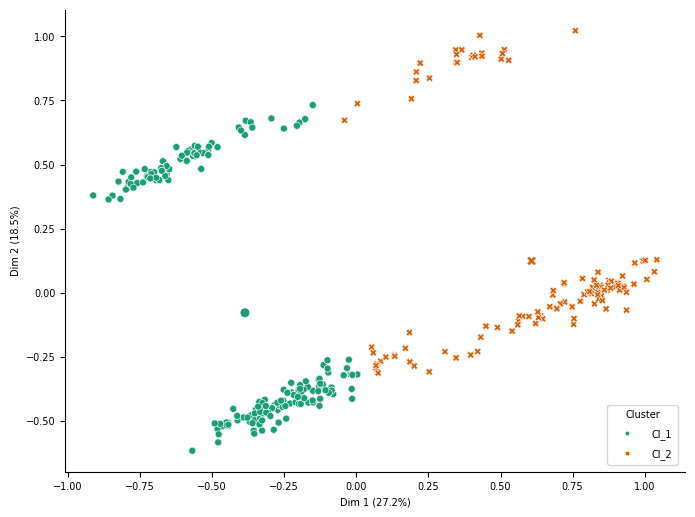

In [10]:
display_results_evidential(X, ecm_models, numeric_labels, up_low_appr=False)

## Weighted ECM (WECM)

In [ ]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, stopping_factor="center")
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [1.42269426961792, 1.42269426961792, 1.42269426961792, 1.4226942696179212, 1.4226942696179212, 1.4226942696179212, 1.4226942696179212, 1.4226942696179212, 1.4226942696179212, 1.4226942696179212]
ARI values: [0.26766012866415634, 0.26766012866415634, 0.26766012866415634, 0.26766012866415634, 0.26766012866415634, 0.26766012866415634, 0.26766012866415634, 0.26766012866415634, 0.26766012866415634, 0.26766012866415634]
NS values: [1.025245426501958, 1.025245426501958, 1.025245426501958, 1.0142382075782965, 1.0142382075782965, 1.0142382075782965, 1.0142382075782965, 1.0142382075782965, 1.0142382075782965, 1.0142382075782965]
NMI values: [0.20304438999860827, 0.20304438999860827, 0.20304438999860827, 0.20304438999860827, 0.20304438999860827, 0.20304438999860827, 0.20304438999860827, 0.20304438999860827, 0.20304438999860827, 0.20304438999860827]


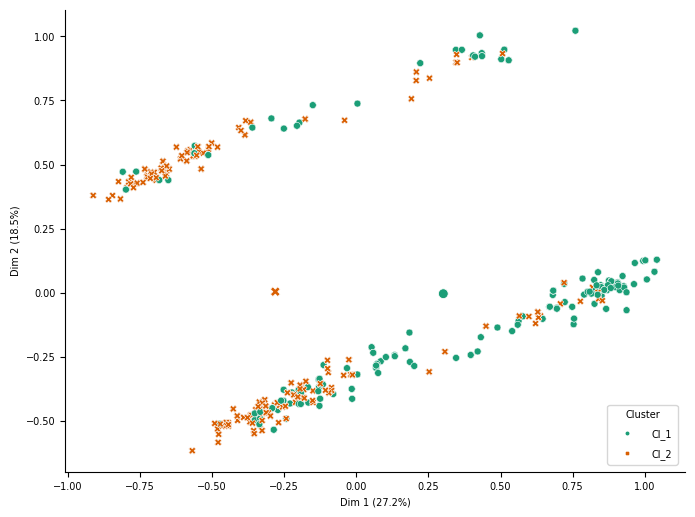

In [18]:
display_results_evidential(X, wecm_models, numeric_labels, up_low_appr=False)

# Weighted FCM - Keller et al. 2000

In [87]:
%%capture
keller_models = np.array([])
w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, w0=w0, verbose=True, epsilon=1e-6)
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [1.7286074466178114, 1.7286074466178114, 1.7286074466178114, 1.7286074466178114, 1.7286074466178114, 1.7286074466178114, 1.7286074466178114, 1.7286074466178114, 1.7286074466178114, 1.7286074466178114]
ARI values: [-0.0008384704079391331, -0.0008384704079391331, -0.0008384704079391331, -0.0008384704079391331, -0.0008384704079391331, -0.0008384704079391331, -0.0008384704079391331, -0.0008384704079391331, -0.0008384704079391331, -0.0008384704079391331]
NMI values: [8.309199359703355e-06, 8.309199359703355e-06, 8.309199359703355e-06, 8.309199359703355e-06, 8.309199359703355e-06, 8.309199359703355e-06, 8.309199359703355e-06, 8.309199359703355e-06, 8.309199359703355e-06, 8.309199359703355e-06]


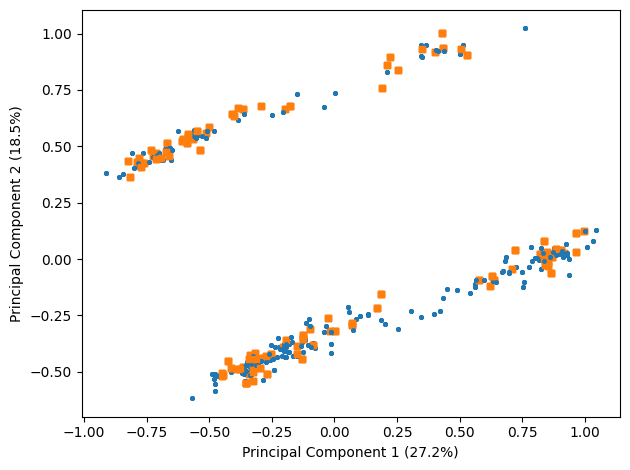

In [88]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [21]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=1.7, verbose=True)
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

J values: [126.80674597419505, 126.80674597419505]
ARI values: [0.1776770082397628, 0.1776770082397628]
NMI values: [0.15105077769684064, 0.15105077769684064]


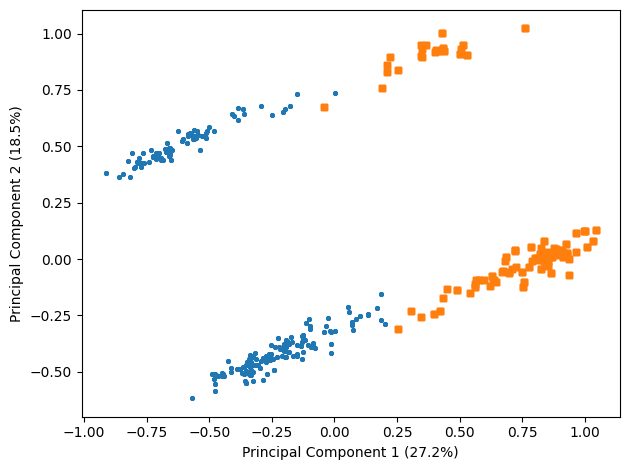

In [22]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [78]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2, epsilon=1e-6, init="None", stop_factor="Center")
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [101.26041086313288, 101.26041087395345, 101.26041089161117, 101.26041097112571, 101.26041113667196, 101.26041128790216, 101.26041130094897, 101.26041130675199, 101.26041132119539, 101.26041145442707]
ARI values: [0.3206385477513274, 0.3206385477513274, 0.3206385477513274, 0.3206385477513274, 0.3206385477513274, 0.3206385477513274, 0.3206385477513274, 0.3206385477513274, 0.3206385477513274, 0.3206385477513274]
NMI values: [0.25490388144348114, 0.25490388144348114, 0.25490388144348114, 0.25490388144348114, 0.25490388144348114, 0.25490388144348114, 0.25490388144348114, 0.25490388144348114, 0.25490388144348114, 0.25490388144348114]


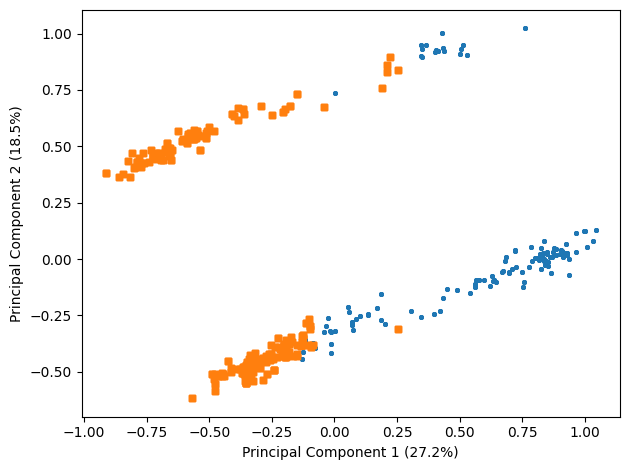

In [79]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [76]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None", epsilon=1e-6, stop_factor="center")
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [1.791738401392326, 1.7917384013924371, 1.7917384013927764, 1.7917384013932462, 1.7917384013939002, 1.79173840139417, 1.7917384013945639, 1.7917384013947937, 1.7917384013949893, 1.7917384013951634]
ARI values: [0.4127828856467386, 0.4127828856467386, 0.4127828856467386, 0.4127828856467386, 0.4127828856467386, 0.4127828856467386, 0.4127828856467386, 0.4127828856467386, 0.4127828856467386, 0.4127828856467386]
NMI values: [0.3241895898232271, 0.3241895898232271, 0.3241895898232271, 0.3241895898232271, 0.3241895898232271, 0.3241895898232271, 0.3241895898232271, 0.3241895898232271, 0.3241895898232271, 0.3241895898232271]


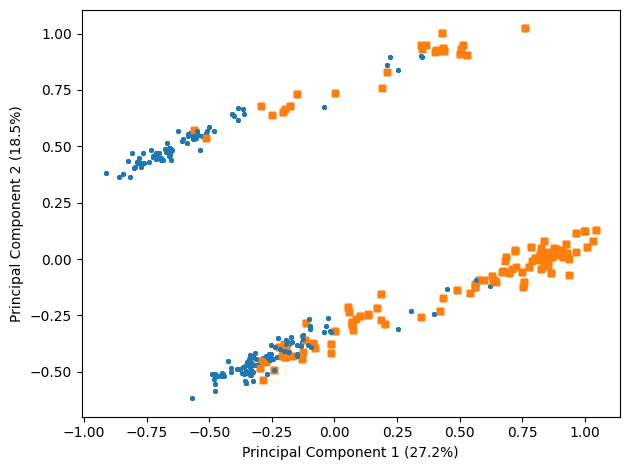

In [77]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [17]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [1.7937368254846853, 1.7937368254846853, 1.7937368254846853, 1.7937368254846853, 1.7937368254846853, 1.7937368254846853, 1.7937368254846853, 1.7937368254846853, 1.7937368254846853, 1.7937368254846853]
ARI values: [0.24975626366251483, 0.24975626366251483, 0.24975626366251483, 0.24975626366251483, 0.24975626366251483, 0.24975626366251483, 0.24975626366251483, 0.24975626366251483, 0.24975626366251483, 0.24975626366251483]
NMI values: [0.18880277588929278, 0.18880277588929278, 0.18880277588929278, 0.18880277588929278, 0.18880277588929278, 0.18880277588929278, 0.18880277588929278, 0.18880277588929278, 0.18880277588929278, 0.18880277588929278]


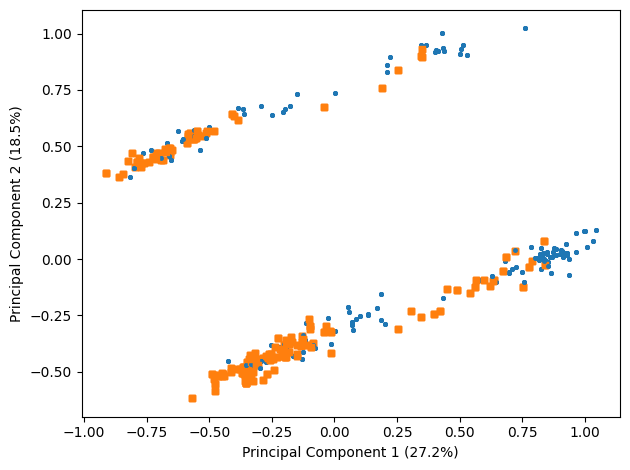

In [18]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [20]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [13.791154517461178, 13.791154517461178, 13.791154517461178, 13.791154517461178, 13.791154517461178, 13.791154517461178, 13.791154517461178, 13.791154517461178, 13.791154517461178, 13.791154517461178]
ARI values: [0.15996190468908458, 0.15996190468908458, 0.15996190468908458, 0.15996190468908458, 0.15996190468908458, 0.15996190468908458, 0.15996190468908458, 0.15996190468908458, 0.15996190468908458, 0.15996190468908458]
NMI values: [0.11903513450566786, 0.11903513450566786, 0.11903513450566786, 0.11903513450566786, 0.11903513450566786, 0.11903513450566786, 0.11903513450566786, 0.11903513450566786, 0.11903513450566786, 0.11903513450566786]


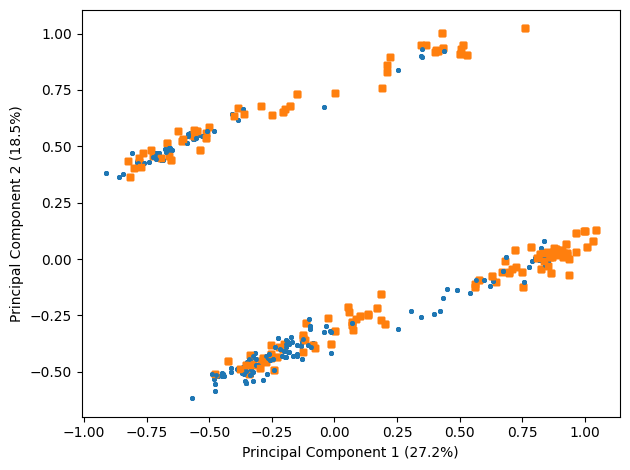

In [21]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)